In [3]:
%matplotlib inline

from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 200)

In [4]:
nrg_bom_df = pd.read_csv('./nrg_bom_df.p')

# Get rid of bad rows.
nrg_bom_df = nrg_bom_df.loc[
    nrg_bom_df.num_of_theaters_opening_weekend > 1
]

nrg_bom_df['def/pos'] = nrg_bom_df.definite_int / nrg_bom_df.positive_int

#### Linear regressions.

bo_open vs unaided_intent 

R^2: 0.8663671583473866
RMSE: 11777799.104911704


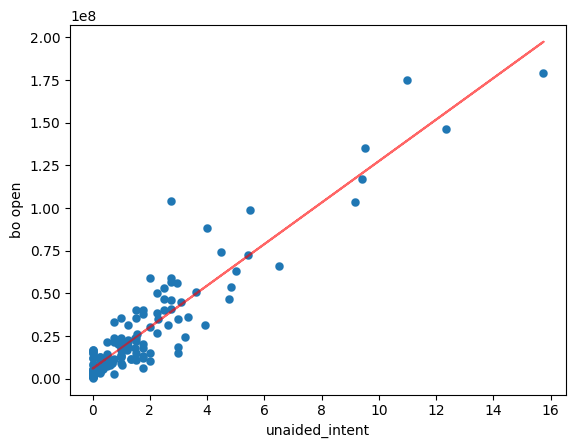

In [5]:
predictor = 'unaided_intent'

df = nrg_bom_df.copy()

X = df[predictor].values
X = X.reshape(-1, 1)
y = df.opening_weekend_gross.values

lr = LinearRegression()
lr.fit(X, y)

df['prediction'] = lr.predict(X)

x = df[predictor]
y1 = df.opening_weekend_gross
y2 = df.prediction

plt.scatter(x, y1, linewidths=.1)
plt.plot(x, y2, color='r', alpha=.6)
pylab.xlabel(predictor)
pylab.ylabel('bo open')

print('R^2: {}'.format(lr.score(X, y)))
print('RMSE: {}'.format(np.sqrt(mse(y1, y2))))

bo_open vs first_choice

R^2: 0.8127951135659236
RMSE: 13940107.751561292


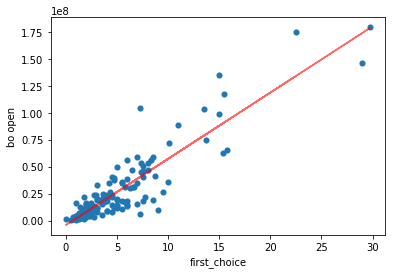

In [4]:
predictor = 'first_choice'

df = nrg_bom_df.copy()

X = df[predictor].values
X = X.reshape(-1, 1)
y = df.opening_weekend_gross.values

lr = LinearRegression()
lr.fit(X, y)

df['prediction'] = lr.predict(X)

x = df[predictor]
y1 = df.opening_weekend_gross
y2 = df.prediction

plt.scatter(x, y1, linewidths=.1)
plt.plot(x, y2, color='r', alpha=.6)
pylab.xlabel(predictor)
pylab.ylabel('bo open')

print('R^2: {}'.format(lr.score(X, y)))
print('RMSE: {}'.format(np.sqrt(mse(y1, y2))))

log(bo_open) vs definite_interest/positive_interest

R^2: 0.7000426928061811
RMSE: 0.6289454913103891


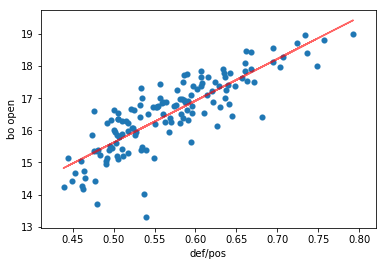

In [5]:
predictor = 'def/pos'

df = nrg_bom_df.copy()

X = df[predictor].values
X = X.reshape(-1, 1)
y = np.log(df.opening_weekend_gross.values)

lr = LinearRegression()
lr.fit(X, y)

df['prediction'] = lr.predict(X)

x = df[predictor]
y1 = np.log(df.opening_weekend_gross)
y2 = df.prediction

plt.scatter(x, y1, linewidths=.1)
plt.plot(x, y2, color='r', alpha=.6)
pylab.xlabel(predictor)
pylab.ylabel('bo open')

print('R^2: {}'.format(lr.score(X, y)))
print('RMSE: {}'.format(np.sqrt(mse(y1, y2))))

RMSE: 17780380.133611422


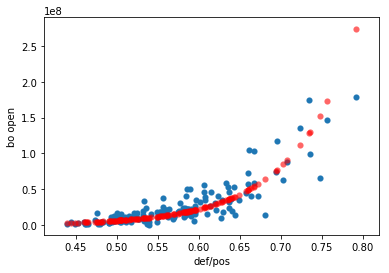

In [6]:
m = lr.coef_[0]
b = lr.intercept_

x = df[predictor]
y1 = df.opening_weekend_gross
y2 = np.exp(b) * np.exp(m * df[predictor])

plt.scatter(x, y1, linewidths=.1)
plt.scatter(x, y2, color='r', linewidths=.1, alpha=.6)
pylab.xlabel(predictor)
pylab.ylabel('bo open')

print('RMSE: {}'.format(np.sqrt(mse(y1, y2))))

#### Quadratic regression.

R^2: 0.7803896196961657
RMSE: 15098505.87992678


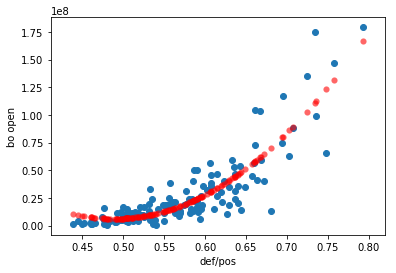

In [6]:
predictor = 'def/pos'

df = nrg_bom_df.copy()

df['x'] = df[predictor]
df['x_sq'] = df[predictor] * df[predictor]

predictor_columns = ['x', 'x_sq']
target_column = 'opening_weekend_gross'

X = df.loc[:, predictor_columns].values
y = df.loc[:, target_column].values

lr = LinearRegression()
lr.fit(X, y)

df['prediction'] = lr.predict(X)

x = df[predictor]
y1 = df.opening_weekend_gross
y2 = df.prediction

plt.scatter(x, y1)
plt.scatter(x, y2, color='r', linewidths=.1, alpha=.6)
pylab.xlabel(predictor)
pylab.ylabel('bo open')

print('R^2: {}'.format(lr.score(X, y)))
print('RMSE: {}'.format(np.sqrt(mse(y1, y2))))

#### Multiple regression.

R^2: 0.8833976810315505
RMSE: 11001733.84580454
Test RMSE: 9411690.096775493


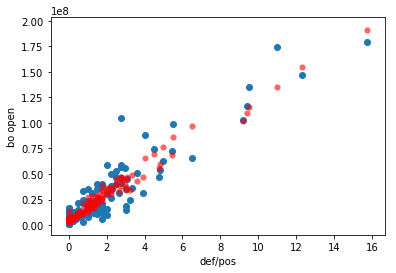

In [7]:
df = nrg_bom_df.copy()
df['def/pos_sq'] = df['def/pos'] * df['def/pos']

predictor_columns = [
    'unaided_intent',
    'first_choice',
    'def/pos',
    'def/pos_sq'
]
target_column = 'opening_weekend_gross'

X = df.loc[:, predictor_columns].values
y = df.loc[:, target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

lr = LinearRegression()
lr.fit(X_train, y_train)

df['prediction'] = lr.predict(X)
test_predictions = lr.predict(X_test)

x = df.unaided_intent
y1 = df.opening_weekend_gross
y2 = df.prediction

plt.scatter(x, y1)
plt.scatter(x, y2, color='r', linewidths=.1, alpha=.6)
pylab.xlabel(predictor)
pylab.ylabel('bo open')

print('R^2: {}'.format(lr.score(X, y)))
print('RMSE: {}'.format(np.sqrt(mse(y1, y2))))
print('Test RMSE: {}'.format(np.sqrt(mse(y_test, test_predictions))))

In [9]:
df['residual'] = df.opening_weekend_gross - df.prediction

df.sort_values('residual')

,movie,unaided_aw,definite_int,positive_int,definite_not_int,unaided_intent,total_aw,first_choice,opening_weekend_gross,production_budget,num_of_theaters_opening_weekend,def/pos,def/pos_sq,prediction,residual
140,X-Men Apocalypse,13.000000,62.250000,83.250000,3.500000,6.500000,86.500000,15.750000,65769562.0,178000000.0,4150.0,0.747748,0.559127,9.702745e+07,-3.125789e+07
85,Resident Evil The Final Chapte,3.750000,44.250000,65.000000,10.500000,1.750000,74.000000,6.000000,13601682.0,40000000.0,3104.0,0.680769,0.463447,3.959494e+07,-2.599326e+07
10,Assassins Creed,7.000000,47.000000,75.000000,5.000000,2.000000,78.000000,9.000000,10278225.0,125000000.0,2970.0,0.626667,0.392711,3.584679e+07,-2.556856e+07
14,Bad Santa 2,4.750000,41.000000,69.000000,8.500000,1.750000,76.250000,7.250000,6176680.0,26000000.0,2920.0,0.594203,0.353077,2.888867e+07,-2.271199e+07
78,Passengers,8.000000,46.000000,79.000000,3.000000,3.000000,68.000000,6.000000,14869736.0,110000000.0,3478.0,0.582278,0.339048,3.680156e+07,-2.193183e+07
15,Baywatch,18.500000,32.750000,59.250000,10.250000,3.000000,87.750000,6.000000,18503871.0,69000000.0,3647.0,0.552743,0.305524,3.431285e+07,-1.580898e+07
57,King Arthur Legend of the Swor,9.333333,42.666667,71.666667,3.000000,2.000000,73.000000,7.000000,15371270.0,175000000.0,3702.0,0.595349,0.354440,3.082599e+07,-1.545472e+07
119,The Mummy,19.503654,42.713579,70.963226,5.717488,3.937571,88.339788,6.663499,31688375.0,125000000.0,4035.0,0.601911,0.362297,4.675176e+07,-1.506338e+07
2,A Dogs Purpose,4.250000,46.750000,74.250000,5.000000,1.750000,61.750000,7.500000,18222810.0,22000000.0,3059.0,0.629630,0.396433,3.316662e+07,-1.494381e+07
36,Fist Fight,3.750000,43.000000,72.750000,4.750000,1.750000,55.750000,5.000000,12201873.0,NaN,3185.0,0.591065,0.349358,2.697580e+07,-1.477392e+07


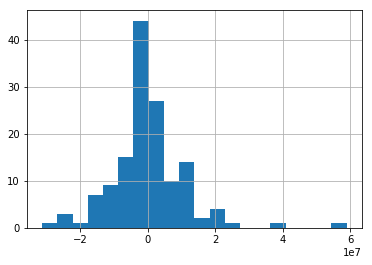

In [10]:
df.residual.hist(bins=20)

#### PCA then multiple regression.

[ 0.98608508  0.01379424]
R^2: 0.8700408805042047
RMSE: 11614778.194120383
Test RMSE: 10671256.781806516


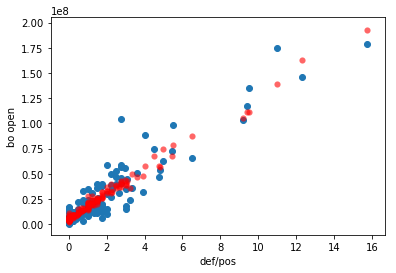

In [11]:
pca = PCA(n_components=2)
pca.fit(X_train)

print(pca.explained_variance_ratio_)

X = pca.transform(X)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

df['prediction'] = lr.predict(X)
test_predictions = lr.predict(X_test)

x = df.unaided_intent
y1 = df.opening_weekend_gross
y2 = df.prediction

plt.scatter(x, y1)
plt.scatter(x, y2, color='r', linewidths=.1, alpha=.6)
pylab.xlabel(predictor)
pylab.ylabel('bo open')

print('R^2: {}'.format(lr.score(X, y)))
print('RMSE: {}'.format(np.sqrt(mse(y1, y2))))
print('Test RMSE: {}'.format(np.sqrt(mse(y_test, test_predictions))))